<a id='intro'></a>
# Data Analysis 

 **In God we trust, all others bring data.** - *The Elements of Statistical Learning*

Big Data, Data Analytics, Data Science etc are the common buzzwords of the data world. So much so that data is considered to be the "new oil". There are excellent data-specific programming tools like SAS, R, Hadoop. Using a more generic scripting language like Python for data analysis is helpful as it allows for combination of data tasks with scientific programming.


One major issue for statistical programmers using Python, in the past has been the lack of libraries implementing standard models and a cohesive framework for specifying models. **Pandas**, the data analysis library which has been in development since 2008, aims to bridge this gap.

Pandas derives its name from  **pan**el **da**tasets, which is a commonly used term for multi-dimensional datasets encountered in statistics and econometrics.


<img src="http://radhakrishna.typepad.com/.a/6a00d83453b94569e20168e98eff44970c-pi" width="500" align = "center" />


Data analysis is only as good as its visualization. Today we will use a number of datasets in combination with the plotting library in Python; **matplotlib** to demonstrate our learnings. The notebook is structured as follows:

## Contents
- [Data Analysis](#intro)
- [Matplotlib](#mpl)
- [Data Analysis: pandas](#pandas)
    - [Series](#series)
    - [String methods](#smethods)
    - [Reading from a csv](#csv)
- [DataFrames](#df)
    - [Exercise 1: DataFrames](#ex1)
    - [Data Manipulation](#dm)
    - [Exercise 2: Data Extraction](#ex2)
    - [Plotting data](#plot)
    - [Missing Data](#missing)
    - [Excercise 3: DataFrame Methods](#ex3)
    - [More Manipulations](#mm)
- [Statistical Tests](#stats)
    - [Regression](#regression)
    - [T-Test](#ttest)
    - [Time Series](#ts)
- [Data Problem](#dp)
    - [Data Cleaning](#dc)
    - [Data Analysis](#da)
- [Miscellaneous plots](#oplot)
- [References](#refs)
- [Credits](#credits)





                   


In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')
#IPython magic command for inline plotting
%matplotlib inline
#a better plot shape for IPython
mpl.rcParams['figure.figsize']=[15,3]

<a id='mpl'></a>
## Quick Overview of matplotlib

Matplotlib is the primary plotting library in Python. We will have a separate notebook dedicated to its features in a subsequent session. For the purpose of plotting with **pandas** today, we will touch upon the very basic plotting in **matplotlib**.

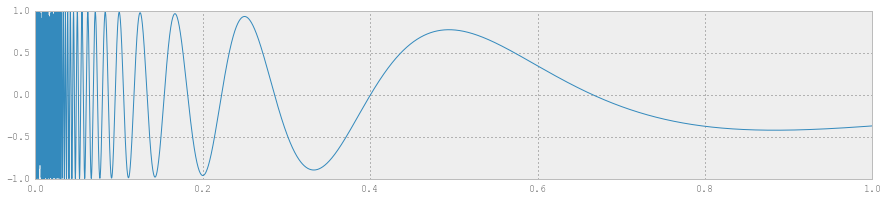

In [12]:
x = np.linspace(0, 1, 10001)
y = np.cos(np.pi/x) * np.exp(-x**2)

plt.plot(x, y)
plt.show()

* Plot the following equations over the domain $x \in \left[-1, 2\right]$.
    * $y = f(x) = x^2 \exp(-x)$
    * $y = f(x) = \log x$
    * $y = f(x) = 1 + x^x + 3 x^4$

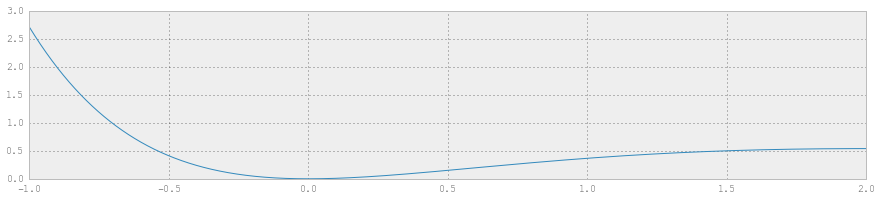

In [13]:
x=np.linspace(-1, 2, 10001)
y = x**2*np.exp(-x)

plt.plot(x, y)
plt.show()

<a id='pandas'></a>

## Data analysis:  pandas

The pandas data analysis module provides data structures and tools for data analysis. It focuses on data handling and manipulation as well as linear and panel regression. It is designed to let you carry out your entire data workflow in Python without having to switch to a domain-specific language such as R. Although largely compatible with NumPy/SciPy, there are some important differences in indexing, data organization, and features. The basic Pandas data type is not `ndarray`, but Series and DataFrame. These allow you to index data and align axes efficiently.

<img src="https://docs.google.com/drawings/d/16Laq9U0qV3tglRiH4aHSq85_wmBaNQdF8wbzh8KFpMk/pub?w=939&h=541" width="500" align = "center" />



<a id='series'></a>
## Series 

A `Series` object is a one-dimensional array which can hold any data type. Like a dictionary, it has a set of indices for access (like keys); unlike a dictionary, it is ordered. Data alignment is intrinsic and will not be broken unless you do it explicitly. It is very similar to ndarray from NumPy.

An arbitrary list of values can be used as the index, or a list of axis labels (so it can act something like a `dict`).

In [14]:
s = pd.Series([1,5,float('NaN'),7.5,2.1,3])
print(s)

0    1.0
1    5.0
2    NaN
3    7.5
4    2.1
5    3.0
dtype: float64


In [15]:
dates = pd.date_range('20140201', periods=s.size)
s.index = dates
print(s)

2014-02-01    1.0
2014-02-02    5.0
2014-02-03    NaN
2014-02-04    7.5
2014-02-05    2.1
2014-02-06    3.0
Freq: D, dtype: float64


In [16]:
letters = ['A', 'B', 'Ch', '#', '#', '---']
s.index = letters
print(s)
print('\nAccess is like a dictionary key:\ns[\'---\'] = '+str(s['---']))
print('\nRepeat labels are possible:\ns[\'#\']=\n'+str(s['#']))

A      1.0
B      5.0
Ch     NaN
#      7.5
#      2.1
---    3.0
dtype: float64

Access is like a dictionary key:
s['---'] = 3.0

Repeat labels are possible:
s['#']=
#    7.5
#    2.1
dtype: float64


NumPy functions expecting an ndarray often do just fine with Series as well.

In [17]:
t = np.exp(s)
print(t)

A         2.718282
B       148.413159
Ch             NaN
#      1808.042414
#         8.166170
---      20.085537
dtype: float64


<a id='smethods'></a>
## String Methods

Series is equipped with a set of string processing methods that make it easy to operate on each element of the array. Perhaps most importantly, these methods exclude missing/NA values automatically. These are accessed via the Series’s str attribute and generally have names matching the equivalent (scalar) built-in string methods:

In [3]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [4]:
 s.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

In [5]:
 s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [6]:
s.str.len()

0     1
1     1
2     1
3     4
4     4
5   NaN
6     4
7     3
8     3
dtype: float64

In [8]:
s2 = pd.Series(['a_b_c', 'c_d_e', np.nan, 'f_g_h'])
print( s2)

0    a_b_c
1    c_d_e
2      NaN
3    f_g_h
dtype: object


In [9]:
s2.str.split('_')

0    [a, b, c]
1    [c, d, e]
2          NaN
3    [f, g, h]
dtype: object


<table>
<tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>cat</td>
<td>Concatenate strings</td>
</tr>
<tr>
<td>split</td>
<td>Split strings on delimiter</td>
</tr>
<tr>
<td>get</td>
<td>Index into each element (retrieve i-th element</td>
</tr>
<tr>
<td>join</td>
<td>Join strings in each element of the Series with passed separator</td>
</tr>
<tr>
<td>contains</td>
<td>Return boolean array if each string contains pattern/regex</td>
</tr>
<tr>
<td>replace</td>
<td>Replace occurrences of pattern/regex with some other string</td>
</tr>
<tr>
<td>repeat</td>
<td>Duplicate values (s.str.repeat(3) equivalent to x * 3)</td>
</tr>
<tr>
<td>pad</td>
<td>Add whitespace to left, right, or both sides of strings</td>
</tr>
<tr>
<td>center</td>
<td>Equivalent to pad(side='both')</td>
</tr>
<tr>
<td>wrap</td>
<td>Split long strings into lines with length less than a given width</td>
</tr>
<tr>
<td>slice</td>
<td>Slice each string in the Series</td>
</tr>
<tr>
<td>slice_replace</td>
<td>Replace slice in each string with passed value</td>
</tr>
<tr>
<td>count</td>
<td>Count occurrences of pattern</td>
</tr>
<tr>
<td>startswith</td>
<td>Equivalent to str.startswith(pat) for each element</td>
</tr>
<tr>
<td>endswith</td>
<td>Equivalent to str.endswith(pat) for each element</td>
</tr>
<tr>
<td>findall </td>
<td>Compute list of all occurrences of pattern/regex for each string</td>
</tr>
<tr>
<td>match</td>
<td>Call re.match on each element, returning matched groups as list</td>
</tr>
<tr>
<td>extract</td>
<td>Call re.match on each element, as match does, but return matched groups as strings for convenience.</td>
</tr>
<tr>
<td>len</td>
<td>Compute string lengths</td>
</tr>
<tr>
<td>strip</td>
<td>Equivalent to str.strip</td>
</tr>
<tr>
<td>rstrip</td>
<td>Equivalent to str.rstrip</td>
</tr>
<tr>
<td>lstrip</td>
<td>Equivalent to str.lstrip</td>
</tr>
<tr>
<td>lower</td>
<td>Equivalent to str.lower</td>
</tr>
<tr>
<td>upper</td>
<td>Equivalent to str.upper</td>
</tr>
</table>

<a id='csv'></a>
## Reading from a csv

In most data scenarios, you will receive a comma separated file, on which you will need to perform your analysis. Reading a `csv` file into Python can be achieved by using the `read_csv` function. We will use the date from [this website](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage), about how many people were on 7 different bike paths in Montreal, each day. Let's use the data from 2012.

In [19]:
broken_df = pd.read_csv('data/2012.csv')

#Look at the first 4 rows
broken_df[:4]

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN
3,04/01/2012,144,NaN,1,116,318,111,8,61,NaN


In [20]:
fixed_df = pd.read_csv('data/2012.csv', index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
01/01/2012,35,NaN,0,38,51,26,10,16,NaN
02/01/2012,83,NaN,1,68,153,53,6,43,NaN
03/01/2012,135,NaN,2,104,248,89,3,58,NaN


<a id='df'></a>
##DataFrame

What we did when we read the `csv` file into `broken_df`, we created a 2 Dimensional data structure called a `DataFrame`. The `DataFrame` object is similar to a table or a spreadsheet in Excel, i.e. a 2D Matrix-like object. 

In [21]:
s = pd.Series([1,5,float('NaN'),7.5,2.1,3])
df = pd.DataFrame(s, columns=['x'])
print(df)

     x
0  1.0
1  5.0
2  NaN
3  7.5
4  2.1
5  3.0


In [22]:
t=np.exp(s)
df['exp(x)'] = t
df['exp(exp(x))'] = np.exp(t)
print(df)

     x       exp(x)   exp(exp(x))
0  1.0     2.718282  1.515426e+01
1  5.0   148.413159  2.851124e+64
2  NaN          NaN           NaN
3  7.5  1808.042414           inf
4  2.1     8.166170  3.519837e+03
5  3.0    20.085537  5.284913e+08


There are a number of ways to access the elements of a `DataFrame`.

In [23]:
print(df['x'], '\n')     #column
#letters = ['A', 'B', 'Ch', '#', '#', '---']
#df.index=letters
#print(df.loc['#'], '\n') #row by label
#print(df.iloc[3], '\n')  #row by number (note the transposition in output!)
print(df[1:4])     #row by slice

0    1.0
1    5.0
2    NaN
3    7.5
4    2.1
5    3.0
Name: x, dtype: float64 

     x       exp(x)   exp(exp(x))
1  5.0   148.413159  2.851124e+64
2  NaN          NaN           NaN
3  7.5  1808.042414           inf


<a id='ex1'></a>
## Exercise 1 : DataFrames

In [24]:
df1=pd.DataFrame(np.random.randn(dates.size,4),index=dates,columns=list('ABCD'))
print (df1)

                   A         B         C         D
2014-02-01  0.635810 -0.687091  0.888070  0.008375
2014-02-02 -0.140188 -1.214239  0.466292 -1.598219
2014-02-03 -2.172451  0.402474 -0.731217 -0.196940
2014-02-04 -0.255211  0.072161 -0.162758  0.521777
2014-02-05 -0.002961  2.014295  0.154249 -0.669286
2014-02-06  0.501299  1.976691 -0.112614 -0.062595


Using the `DataFrame df1` created above, perform the following operations:

    1. df1.head() and df1.tail()
    2. df1.describe()
    3. df1.T
    4. df1.sort(columns='B')
    5. df1.columns, df1.index, df1.values

In [25]:
df1.sort(columns=list('B'))

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,A,B,C,D
2014-02-02,-0.140188,-1.214239,0.466292,-1.598219
2014-02-01,0.635810,-0.687091,0.888070,0.008375
2014-02-04,-0.255211,0.072161,-0.162758,0.521777
2014-02-03,-2.172451,0.402474,-0.731217,-0.196940
2014-02-06,0.501299,1.976691,-0.112614,-0.062595
2014-02-05,-0.002961,2.014295,0.154249,-0.669286


<a id='dm'></a>
## DataFrames: Data Manipulation

Now let us look at the cyclist DataFrame we created.  To extract a column from the DataFrame, 

In [26]:
fixed_df['Berri 1']

Date
01/01/2012      35
02/01/2012      83
03/01/2012     135
04/01/2012     144
05/01/2012     197
06/01/2012     146
07/01/2012      98
08/01/2012      95
09/01/2012     244
10/01/2012     397
11/01/2012     273
12/01/2012     157
13/01/2012      75
14/01/2012      32
15/01/2012      54
16/01/2012     168
17/01/2012     155
18/01/2012     139
19/01/2012     191
20/01/2012     161
21/01/2012      53
22/01/2012      71
23/01/2012     210
24/01/2012     299
25/01/2012     334
26/01/2012     306
27/01/2012      91
28/01/2012      80
29/01/2012      87
30/01/2012     219
              ... 
07/10/2012    1580
08/10/2012    1854
09/10/2012    4787
10/10/2012    3115
11/10/2012    3746
12/10/2012    3169
13/10/2012    1783
14/10/2012     587
15/10/2012    3292
16/10/2012    3739
17/10/2012    4098
18/10/2012    4671
19/10/2012    1313
20/10/2012    2011
21/10/2012    1277
22/10/2012    3650
23/10/2012    4177
24/10/2012    3744
25/10/2012    3735
26/10/2012    4290
27/10/2012    1857
28/10/2

We can use **Boolean indexing** on columns to extract information satisfying our desired conditions. For example, if I wished to extract all data from the cyclist data set where the value in the column `Berri 1` is greater than 1000,

In [27]:
fixed_df[fixed_df['Berri 1'] > 1000]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
18/03/2012,1940,NaN,856,1036,1923,1021,1128,2477,NaN
19/03/2012,1821,NaN,1024,1278,2581,1609,506,2058,NaN
20/03/2012,2481,NaN,1261,1709,3130,1955,762,2609,NaN
21/03/2012,2829,NaN,1558,1893,3510,2225,993,2846,NaN
22/03/2012,2195,NaN,1030,1640,2654,1958,548,2254,NaN
23/03/2012,2115,NaN,1143,1512,2955,1791,663,2325,NaN
27/03/2012,1049,NaN,517,774,1576,972,163,1207,NaN
30/03/2012,1157,NaN,529,910,1596,957,196,1288,NaN
02/04/2012,1937,NaN,967,1537,2853,1614,394,2122,NaN


In [29]:
from pandas.util.testing import rands
df=pd.DataFrame(np.random.randn(dates.size,4),index=dates,columns=list('ABCD'))
print (df)

                   A         B         C         D
2014-02-01  1.044694  1.130160 -1.359757  1.567403
2014-02-02  0.777721  1.908093  0.261824 -0.234788
2014-02-03 -0.891608 -0.511399 -1.120099  0.201919
2014-02-04 -1.254585  1.364857  0.735135 -0.181704
2014-02-05 -2.399113 -1.022337 -1.237169 -1.599741
2014-02-06  1.962021 -0.798897  0.086004 -0.387395


In [30]:
df[df.B>0]

,A,B,C,D
2014-02-01,1.044694,1.130160,-1.359757,1.567403
2014-02-02,0.777721,1.908093,0.261824,-0.234788
2014-02-04,-1.254585,1.364857,0.735135,-0.181704


In [31]:
df[df > 0]

,A,B,C,D
2014-02-01,1.044694,1.130160,NaN,1.567403
2014-02-02,0.777721,1.908093,0.261824,NaN
2014-02-03,NaN,NaN,NaN,0.201919
2014-02-04,NaN,1.364857,0.735135,NaN
2014-02-05,NaN,NaN,NaN,NaN
2014-02-06,1.962021,NaN,0.086004,NaN


In [32]:
df2 = df.copy()
df2['E']=['one', 'one','two','three','four','three']
print (df2)

                   A         B         C         D      E
2014-02-01  1.044694  1.130160 -1.359757  1.567403    one
2014-02-02  0.777721  1.908093  0.261824 -0.234788    one
2014-02-03 -0.891608 -0.511399 -1.120099  0.201919    two
2014-02-04 -1.254585  1.364857  0.735135 -0.181704  three
2014-02-05 -2.399113 -1.022337 -1.237169 -1.599741   four
2014-02-06  1.962021 -0.798897  0.086004 -0.387395  three


In [33]:
df2[df2['E'].isin(['one'])]

,A,B,C,D,E
2014-02-01,1.044694,1.130160,-1.359757,1.567403,one
2014-02-02,0.777721,1.908093,0.261824,-0.234788,one


In [34]:
df.at[dates[0],'A'] = 0
print (df)

                   A         B         C         D
2014-02-01  0.000000  1.130160 -1.359757  1.567403
2014-02-02  0.777721  1.908093  0.261824 -0.234788
2014-02-03 -0.891608 -0.511399 -1.120099  0.201919
2014-02-04 -1.254585  1.364857  0.735135 -0.181704
2014-02-05 -2.399113 -1.022337 -1.237169 -1.599741
2014-02-06  1.962021 -0.798897  0.086004 -0.387395


In [36]:
df.iat[0,1] = 0
print( df)

                   A         B         C         D
2014-02-01  0.000000  0.000000 -1.359757  1.567403
2014-02-02  0.777721  1.908093  0.261824 -0.234788
2014-02-03 -0.891608 -0.511399 -1.120099  0.201919
2014-02-04 -1.254585  1.364857  0.735135 -0.181704
2014-02-05 -2.399113 -1.022337 -1.237169 -1.599741
2014-02-06  1.962021 -0.798897  0.086004 -0.387395


<a id='ex2'></a>
## Exercise 2 : Conditional data extraction

In [38]:
from random import randint
df = pd.DataFrame({'A': [randint(1, 9) for x in range(10)],
                   'B': [randint(1, 9)*10 for x in range(10)],
                   'C': [randint(1, 9)*100 for x in range(10)]})
print (df)

   A   B    C
0  3  40  600
1  7  50  400
2  4  70  900
3  4  50  800
4  3  40  100
5  6  60  700
6  2  50  400
7  7  20  100
8  3  30  200
9  3  30  500


Find the entries from *A* for which corresponding values for *B* will be greater than 50, and those in *C*   equal to 900

In [39]:
df[(df['B']>50)&(df['C']==900)]['A']

2    4
Name: A, dtype: int64

<a id='plot'></a>
### Plotting Data

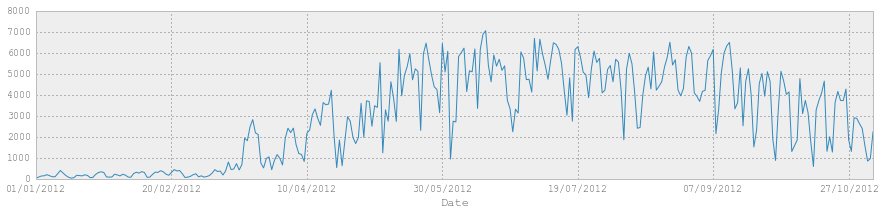

In [40]:
fixed_df['Berri 1'].plot()

<a id='missing'></a>
## Missing Data

Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. For example, in a collection of financial time series, some of the time series might start on different dates. Thus, values prior to the start date would generally be marked as missing.

As data comes in many shapes and forms, `pandas` aims to be flexible with regard to handling missing data. While NaN is the default missing value marker for reasons of computational speed and convenience, we need to be able to easily detect this value with data of different types: floating point, integer, boolean, and general object. In many cases, however, the Python None will arise and we wish to also consider that “missing” or “null”.

In [41]:
df= pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print (df)

                   A         B         C         D
2014-02-01 -1.595035 -1.163599  1.774166  0.186723
2014-02-02 -0.122285  0.907700  1.081215  1.180817
2014-02-03 -0.984206  0.871297 -1.359302  2.777187
2014-02-04  0.109872  0.076080  1.869030 -0.714793
2014-02-05  0.799914 -0.249205 -1.036804  0.731544
2014-02-06  2.492378  0.398399  0.676536 -0.174139


In [42]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
print (df1)

                   A         B         C         D   E
2014-02-01 -1.595035 -1.163599  1.774166  0.186723 NaN
2014-02-02 -0.122285  0.907700  1.081215  1.180817 NaN
2014-02-03 -0.984206  0.871297 -1.359302  2.777187 NaN
2014-02-04  0.109872  0.076080  1.869030 -0.714793 NaN


In [43]:
df1.loc[dates[0]:dates[1],'E'] = 1
print (df1)

                   A         B         C         D   E
2014-02-01 -1.595035 -1.163599  1.774166  0.186723   1
2014-02-02 -0.122285  0.907700  1.081215  1.180817   1
2014-02-03 -0.984206  0.871297 -1.359302  2.777187 NaN
2014-02-04  0.109872  0.076080  1.869030 -0.714793 NaN


In [44]:
df1.dropna(how='all') #any

,A,B,C,D,E
2014-02-01,-1.595035,-1.163599,1.774166,0.186723,1
2014-02-02,-0.122285,0.907700,1.081215,1.180817,1
2014-02-03,-0.984206,0.871297,-1.359302,2.777187,NaN
2014-02-04,0.109872,0.076080,1.869030,-0.714793,NaN


In [45]:
df1.fillna(value=15)

,A,B,C,D,E
2014-02-01,-1.595035,-1.163599,1.774166,0.186723,1
2014-02-02,-0.122285,0.907700,1.081215,1.180817,1
2014-02-03,-0.984206,0.871297,-1.359302,2.777187,15
2014-02-04,0.109872,0.076080,1.869030,-0.714793,15


In [46]:
pd.isnull(df1)

,A,B,C,D,E
2014-02-01,False,False,False,False,False
2014-02-02,False,False,False,False,False
2014-02-03,False,False,False,False,True
2014-02-04,False,False,False,False,True


Missing values propogate through arithmetic operations.

In [47]:
df2=pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print (df2)
df2.loc[dates[0]:dates[2],'B']=float('NaN')
print (df2)
print (df1+df2)

                   A         B         C         D
2014-02-01 -0.122157 -2.682535 -0.881070 -0.519131
2014-02-02 -0.359250 -0.302610 -0.788213  0.624671
2014-02-03  1.800519  0.344394 -0.154029  0.020700
2014-02-04  1.135173 -2.239083  0.044581 -0.680977
2014-02-05 -0.023035 -1.700010 -1.630849  0.734532
2014-02-06  0.282321 -0.841919 -0.497897 -0.457394
                   A         B         C         D
2014-02-01 -0.122157       NaN -0.881070 -0.519131
2014-02-02 -0.359250       NaN -0.788213  0.624671
2014-02-03  1.800519       NaN -0.154029  0.020700
2014-02-04  1.135173 -2.239083  0.044581 -0.680977
2014-02-05 -0.023035 -1.700010 -1.630849  0.734532
2014-02-06  0.282321 -0.841919 -0.497897 -0.457394
                   A         B         C         D   E
2014-02-01 -1.717191       NaN  0.893096 -0.332408 NaN
2014-02-02 -0.481535       NaN  0.293001  1.805488 NaN
2014-02-03  0.816313       NaN -1.513331  2.797886 NaN
2014-02-04  1.245045 -2.163003  1.913611 -1.395771 NaN
2014-02-05 

But this can be avoided by using built-in methods, that exclude missing values.

In [48]:
df1['A'].sum()

-2.5916536148558293

In [49]:
df1.mean(1)

2014-02-01    0.040451
2014-02-02    0.809489
2014-02-03    0.326244
2014-02-04    0.335047
Freq: D, dtype: float64

In [50]:
df2.cumsum()

,A,B,C,D
2014-02-01,-0.122157,NaN,-0.881070,-0.519131
2014-02-02,-0.481407,NaN,-1.669283,0.105540
2014-02-03,1.319113,NaN,-1.823312,0.126240
2014-02-04,2.454286,-2.239083,-1.778731,-0.554738
2014-02-05,2.431251,-3.939093,-3.409580,0.179794
2014-02-06,2.713572,-4.781013,-3.907477,-0.277600


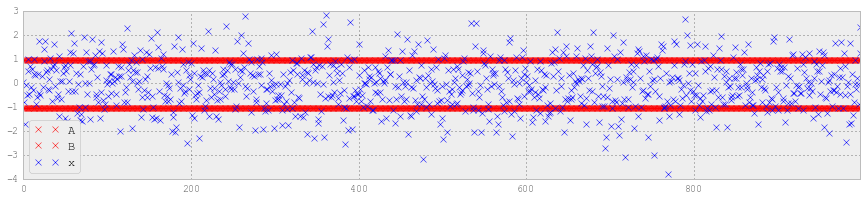

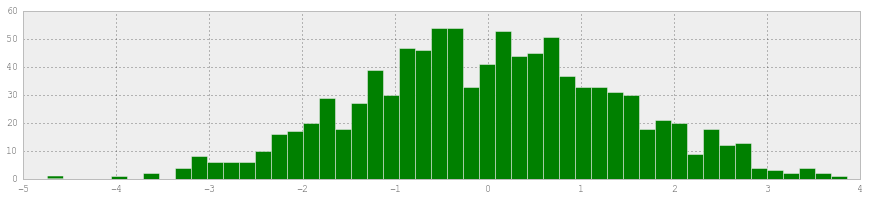

In [51]:
#Gaussian numbers histogram
from numpy.random import normal
n = 1000
x = pd.Series(normal(size=n))
#print x
avg = x.mean()
std = x.std()

x_avg  = pd.Series(np.ones(n)* avg)
x_stdl = pd.Series(np.ones(n)*(avg-std))
x_stdh = pd.Series(np.ones(n)*(avg+std))

df_gauss=pd.DataFrame({'A':x_stdl,'B':x_stdh,'x':x})

df_gauss.plot(style=['rx','rx','bx'])
plt.figure()
df_gauss['x'].diff().hist(color='g', bins=50)

<a id='ex3'></a>
## Exercise 3: DataFrame methods

In [52]:
df=pd.DataFrame(np.random.randn(5,5), columns=list('ABCDE'))
print (df)

          A         B         C         D         E
0  0.442873 -0.686528  1.265040  0.066939  0.852613
1 -1.137857  1.182940  1.297956 -0.042103  0.052417
2 -0.027732  0.780030 -1.150562  0.160569 -0.007918
3 -1.658620 -0.581731 -0.670615 -2.568368 -0.067003
4  1.993835 -1.889272  0.718408 -0.509911  1.019811


Try the following with `df` as defined above:

    1. df.mean()
    2. df.apply(np.cumsum)
    3. df.apply(lambda x: x.max() - x.min())
    4. Plot a histogram

A   -0.077500
B   -0.238912
C    0.292045
D   -0.578575
E    0.369984
dtype: float64
          A         B         C         D         E
0  0.442873 -0.686528  1.265040  0.066939  0.852613
1 -0.694984  0.496412  2.562995  0.024836  0.905030
2 -0.722715  1.276442  1.412433  0.185405  0.897111
3 -2.381335  0.694711  0.741818 -2.382963  0.830108
4 -0.387500 -1.194561  1.460226 -2.892874  1.849920
A    3.652454
B    3.072212
C    2.448518
D    2.728937
E    1.086814
dtype: float64


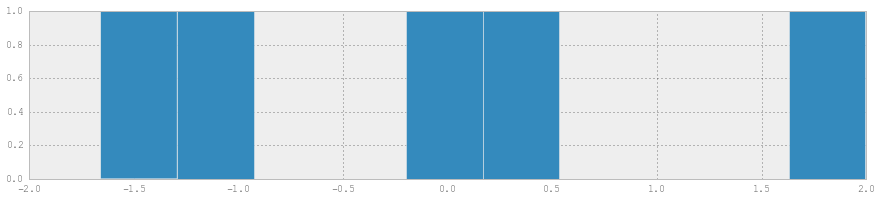

In [56]:
print(df.mean())
print(df.apply(np.cumsum))
print(df.apply(lambda x: x.max() - x.min()))
df['A'].hist()

In [53]:
df.apply(lambda x: x.max() - x.min())
#What does lambda do?

A    3.652454
B    3.072212
C    2.448518
D    2.728937
E    1.086814
dtype: float64

In [55]:
def f(x):
...     return x*2
g = lambda x: x*2 

print (g(3))

6


<a id='mm'></a>
### More manipulations

In [60]:
#from pandas import read_csv
#from urllib import urlopen
#page = urlopen("http://econpy.pythonanywhere.com/ex/NFL_1979.csv")
df = pd.read_csv('data/NFL_1979.csv')
print (df[:3])

         Date          Visitor  Visitor Score             Home Team  \
0  09/01/1979    Detroit Lions             16  Tampa Bay Buccaneers   
1  09/02/1979  Atlanta Falcons             40    New Orleans Saints   
2  09/02/1979  Baltimore Colts              0    Kansas City Chiefs   

   Home Score  Line  Total Line  
0          31     3          30  
1          34     5          32  
2          14     1          37  


In [61]:
df1=df[0:10]

In [62]:
print (df1)

         Date             Visitor  Visitor Score             Home Team  \
0  09/01/1979       Detroit Lions             16  Tampa Bay Buccaneers   
1  09/02/1979     Atlanta Falcons             40    New Orleans Saints   
2  09/02/1979     Baltimore Colts              0    Kansas City Chiefs   
3  09/02/1979  Cincinnati Bengals              0        Denver Broncos   
4  09/02/1979    Cleveland Browns             25         New York Jets   
5  09/02/1979      Dallas Cowboys             22    St Louis Cardinals   
6  09/02/1979   Green Bay Packers              3         Chicago Bears   
7  09/02/1979      Houston Oilers             29   Washington Redskins   
8  09/02/1979      Miami Dolphins              9         Buffalo Bills   
9  09/02/1979     New York Giants             17   Philadelphia Eagles   

   Home Score  Line  Total Line  
0          31     3        30.0  
1          34     5        32.0  
2          14     1        37.0  
3          10     3        31.5  
4          22  

In [63]:
A=df1[:3]
B=df1[3:7]
C=df1[7:10]
print (A,B,C)

         Date          Visitor  Visitor Score             Home Team  \
0  09/01/1979    Detroit Lions             16  Tampa Bay Buccaneers   
1  09/02/1979  Atlanta Falcons             40    New Orleans Saints   
2  09/02/1979  Baltimore Colts              0    Kansas City Chiefs   

   Home Score  Line  Total Line  
0          31     3          30  
1          34     5          32  
2          14     1          37            Date             Visitor  Visitor Score           Home Team  \
3  09/02/1979  Cincinnati Bengals              0      Denver Broncos   
4  09/02/1979    Cleveland Browns             25       New York Jets   
5  09/02/1979      Dallas Cowboys             22  St Louis Cardinals   
6  09/02/1979   Green Bay Packers              3       Chicago Bears   

   Home Score  Line  Total Line  
3          10     3        31.5  
4          22     2        41.0  
5          21    -4        37.0  
6           6     3        31.0            Date          Visitor  Visitor Score   

In [64]:
parts=[A,B,C]
df2=pd.concat(parts)
print (df2)

         Date             Visitor  Visitor Score             Home Team  \
0  09/01/1979       Detroit Lions             16  Tampa Bay Buccaneers   
1  09/02/1979     Atlanta Falcons             40    New Orleans Saints   
2  09/02/1979     Baltimore Colts              0    Kansas City Chiefs   
3  09/02/1979  Cincinnati Bengals              0        Denver Broncos   
4  09/02/1979    Cleveland Browns             25         New York Jets   
5  09/02/1979      Dallas Cowboys             22    St Louis Cardinals   
6  09/02/1979   Green Bay Packers              3         Chicago Bears   
7  09/02/1979      Houston Oilers             29   Washington Redskins   
8  09/02/1979      Miami Dolphins              9         Buffalo Bills   
9  09/02/1979     New York Giants             17   Philadelphia Eagles   

   Home Score  Line  Total Line  
0          31     3        30.0  
1          34     5        32.0  
2          14     1        37.0  
3          10     3        31.5  
4          22  

In [65]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right= pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print (left)
print (right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [66]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [67]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [68]:
rowadd=df.iloc[3]

In [69]:
print (rowadd,df)

A    0.276614
B    1.438200
C   -0.459466
D    1.064576
Name: 3, dtype: float64           A         B         C         D
0  1.509382  0.519778  1.861436 -1.052911
1  0.746159  0.867871  0.741534 -0.227359
2  0.167752 -0.464235  1.201760 -0.950807
3  0.276614  1.438200 -0.459466  1.064576
4 -0.466815 -0.232430  0.379266  1.072125
5  1.128664 -1.586765 -0.748975  0.531324
6 -0.596888  0.123767  0.708537 -1.505629
7 -1.593031  0.351249  1.498741  1.370804


In [70]:
df.append(rowadd,ignore_index=True)

,A,B,C,D
0,1.509382,0.519778,1.861436,-1.052911
1,0.746159,0.867871,0.741534,-0.227359
2,0.167752,-0.464235,1.201760,-0.950807
3,0.276614,1.438200,-0.459466,1.064576
4,-0.466815,-0.232430,0.379266,1.072125
5,1.128664,-1.586765,-0.748975,0.531324
6,-0.596888,0.123767,0.708537,-1.505629
7,-1.593031,0.351249,1.498741,1.370804
8,0.276614,1.438200,-0.459466,1.064576


In [71]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
print (df)

     A      B         C         D
0  foo    one -0.961535  1.833051
1  bar    one  0.392670 -0.466843
2  foo    two -0.123662 -0.010070
3  bar  three -0.549928 -1.090578
4  foo    two -0.075232  0.427465
5  bar    two  0.837986  0.531168
6  foo    one -1.749245 -0.594726
7  foo  three -0.486640  0.629302


In [72]:
df.groupby('A').sum()

,C,D
A,,
bar,0.680728,-1.026253
foo,-3.396314,2.285022


In [73]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.392670 -0.466843
    three -0.549928 -1.090578
    two    0.837986  0.531168
foo one   -2.710779  1.238325
    three -0.486640  0.629302
    two   -0.198895  0.417395

<a id='stats'></a>
## Statistical Tests

`pandas` allows for using some built-in statistical methods to compare, fit or interpolate data. 

<a id='regression'></a>
### Regression

Regression analysis refers to the process of estimating relationships between variables. Linear regression is equivalent to fitting a line between to sets of data points (x,y)

$$y_i(x) = a_0 + a_1x_i $$

In [74]:

import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
url = "http://vincentarelbundock.github.com/Rdatasets/csv/HistData/Guerry.csv"
df = pd.read_csv(url)
#print df
df = df[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
df.head()


,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E


In [75]:

mod = sm.ols(formula='Lottery ~ Literacy ', data=df)
res = mod.fit()
print (res.summary())
intercept, slope =res.params

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     14.16
Date:                Mon, 16 May 2016   Prob (F-statistic):           0.000312
Time:                        15:02:10   Log-Likelihood:                -386.13
No. Observations:                  85   AIC:                             776.3
Df Residuals:                      83   BIC:                             781.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     64.2389      6.163     10.423      0.0

In [76]:
xtest=np.linspace(1,100,100)
ytest=intercept+slope*xtest

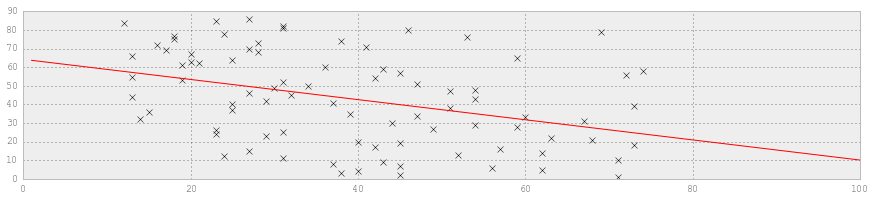

In [77]:
plt.plot(df['Literacy'],df['Lottery'],'kx')
plt.plot(xtest,ytest,'r')
plt.show()

<a id='ttest'></a>
### T-Test

The t-test assesses whether the means of two groups are statistically different from each other.

Town 1 avg. height 5.87142857143
Town 2 avg. height 6.35
Effect size:  0.478571428571


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


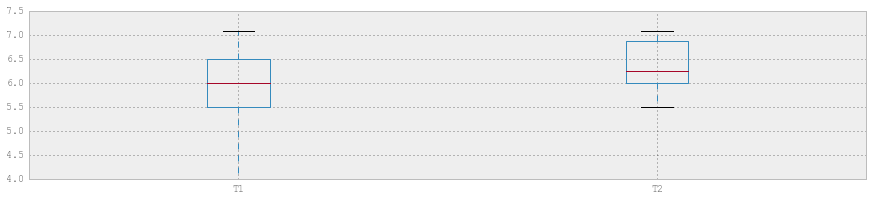

In [78]:

town1_heights = pd.Series([5, 6, 7, 6, 7.1, 6, 4])
town2_heights = pd.Series([5.5, 6.5, 7, 6, 7.1, 6])

town1_mean = town1_heights.mean()
town2_mean = town2_heights.mean()

print ("Town 1 avg. height", town1_mean)
print ("Town 2 avg. height", town2_mean)

print ("Effect size: ", abs(town1_mean - town2_mean))

df=pd.DataFrame({'T1':town1_heights,'T2':town2_heights})
b=df.boxplot()

In [79]:
from scipy import stats

print ("Town 1 Shapiro-Wilks p-value", stats.shapiro(town1_heights)[1])

print (" T-Test p-value:", stats.ttest_ind(town1_heights, town2_heights,equal_var = False)[1])

Town 1 Shapiro-Wilks p-value 0.3804582953453064
 T-Test p-value: 0.347028503558


<a id='ts'></a>
### Time Series

A time series is a sequence of data points, measured typically at successive points in time spaced at uniform time intervals. 

In [80]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
print (rng)

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

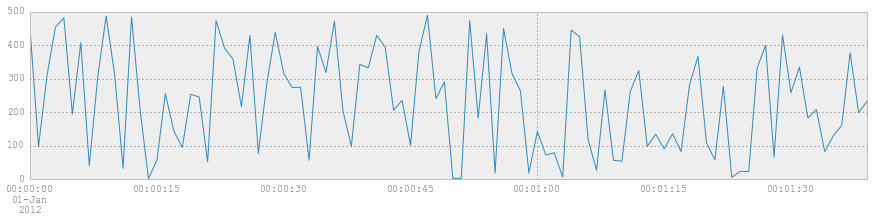

In [81]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.plot()

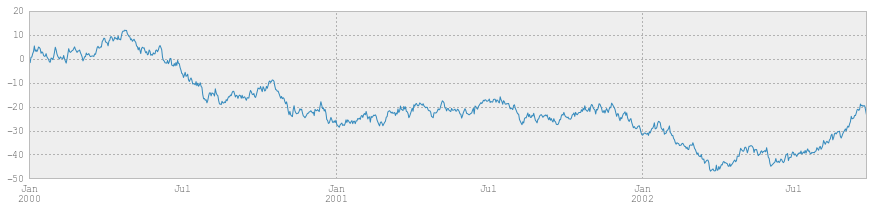

In [82]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts=ts.cumsum()
ts.plot()

0   -1.919363
1    3.677815
2   -0.139645
3    4.267394
4    0.942686
Name: 2000-01-06 00:00:00, dtype: float64


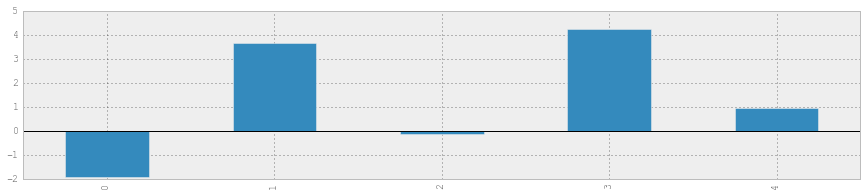

In [83]:
#Bar plot

ts = pd.DataFrame(np.random.randn(1000,5), index=pd.date_range('1/1/2000', periods=1000))
ts=ts.cumsum()
print (ts.ix[5])
ts.ix[5].plot(kind='bar'); plt.axhline(0, color='k')

<a id='dp'></a>
## Data Problem

Imagine yourself to be a sales analyst at an apparel company. Your boss asks you to look at weather data from the past year to understand the weather data over the months, so that you can have the right apparel on display at the appropriate time.

You can get the data from [here](http://climate.weather.gc.ca/index_e.html) (so your company is Canadian). The template for downloading the data is:



In [84]:
url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

Usually in data tasks, there are no specified objectives. One needs to play around with the data in order to derive inferences. While this might seem like a vague and daunting task, it simply requires a start and once you get familiar with the data, you will eventually find some patterns and will be able to make an initial set of conclusions.

Here let's start with the data for March 2012 (there seems to be less data for the more recent years).

<a id='dc'></a>

### Data Cleaning

In [86]:
url

'http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year=2012&Month=3&timeframe=1&submit=Download+Data'

In [85]:
url = url_template.format(month=3, year=2012)
weather_mar2012 = pd.read_csv(url, skiprows=16, index_col='Date/Time', parse_dates=True, encoding='latin1')

HTTPError: HTTP Error 404: Not Found

In [ ]:
weather_mar2012

We are only interested in the temperatures, so let's go ahead and plot the column for the month of March,2012. But we also see that the Temp column has some special characters, which might be painful to reuse. So, let's fix that first!


In [ ]:
weather_mar2012.columns = [
    u'Year', u'Month', u'Day', u'Time', u'Data Quality', u'Temp (C)', 
    u'Temp Flag', u'Dew Point Temp (C)', u'Dew Point Temp Flag', 
    u'Rel Hum (%)', u'Rel Hum Flag', u'Wind Dir (10s deg)', u'Wind Dir Flag', 
    u'Wind Spd (km/h)', u'Wind Spd Flag', u'Visibility (km)', u'Visibility Flag',
    u'Stn Press (kPa)', u'Stn Press Flag', u'Hmdx', u'Hmdx Flag', u'Wind Chill', 
    u'Wind Chill Flag', u'Weather']

In [ ]:
weather_mar2012[u'Temp (C)'].plot(figsize=(15, 5))

There are also many columns with NA values. We cannot use them in any of our analyses, so we can go ahead and drop them.

In [ ]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012

We managed to clean up some of the data for March 2012. That's great, but we are also interested in the entire year's data. 

In [87]:
##Pandas cookbook
def download_weather_month(year, month):
    if month == 1:
        year += 1
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=16, index_col='Date/Time', parse_dates=True)
    weather_data = weather_data.dropna(axis=1)
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time', 'Data Quality'], axis=1)
    return weather_data

In [88]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]


HTTPError: HTTP Error 404: Not Found

In [ ]:
#Saving to a csv
weather_2012 = pd.concat(data_by_month)
weather_2012.to_csv('weather_2012.csv')

<a id='da'></a>
### Data Analysis

`pandas` provides vectorized string functions, to make it easy to operate on columns containing text.

In [ ]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')
is_snowing.plot()

Let's now try to find the month where it snowed the most, so that your company can have extra stock of those down jackets for this month. 

In [ ]:
weather_2012['Temp (C)'].resample('M', how=np.median).plot(kind='bar')

In [ ]:
is_snowing.astype(float).resample('M', how=np.mean)

In [ ]:
is_snowing.astype(float).resample('M', how=np.mean).plot(kind='bar')

<a id='oplot'></a>
## Other kinds of Plotting 
### Scatter plots

In [90]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
print (df)
#df.plot(kind='bar')
#df.plot(kind='bar', stacked=True)
#df.plot(kind='barh', stacked=True)
#print pd.__version__


          a         b         c         d
0  0.700221  0.665854  0.328728  0.890290
1  0.724810  0.277573  0.887679  0.900549
2  0.633189  0.794786  0.068595  0.118457
3  0.783162  0.873014  0.269107  0.759255
4  0.512902  0.103984  0.695324  0.828817
5  0.708275  0.775201  0.566761  0.374877
6  0.401758  0.517074  0.881204  0.711706
7  0.330855  0.808377  0.921591  0.648551
8  0.710716  0.146534  0.933873  0.787246
9  0.548174  0.265096  0.169263  0.905545


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023715D8C668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000023717285EF0>]], dtype=object)

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


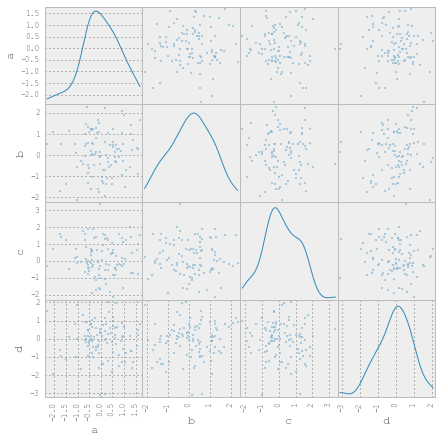

In [91]:
from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(100, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, figsize=(7, 7), diagonal='kde')

### Parallel Coordinates

In [92]:
from pandas import read_csv
from urllib import urlopen
from pandas.tools.plotting import andrews_curves 

page = urlopen("https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv")
df = read_csv(page)
andrews_curves(df, 'Name')

from pandas.tools.plotting import parallel_coordinates

#parallel_coordinates(df,'Name')


ImportError: cannot import name 'urlopen'

### Lag plots

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


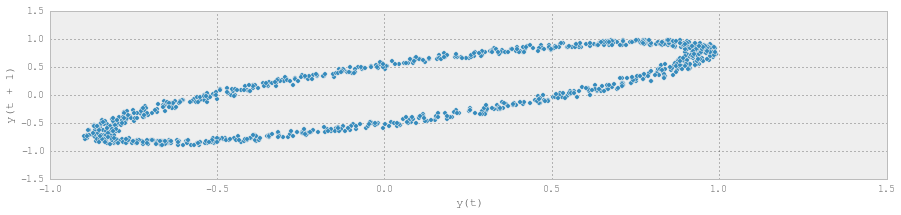

In [93]:
from pandas.tools.plotting import lag_plot
data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
lag_plot(data)

<a id='refs'></a>
## References
- [Pandas cookbook](https://github.com/jvns/pandas-cookbook)
- [Pandas Data Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html/). 
- [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/index.html/).
- [On Andrew's curves](http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/mvahtmlnode9.html)
- [Parallel coordinates](http://en.wikipedia.org/wiki/Parallel_coordinates)

---
<a id='credits'></a>
## Credits

Neal Davis and Lakshmi Rao developed these materials for [Computational Science and Engineering](http://cse.illinois.edu/) at the University of Illinois at Urbana–Champaign.

<img src="http://i.creativecommons.org/l/by/3.0/88x31.png" align="left">
This content is available under a [Creative Commons Attribution 3.0 Unported License](https://creativecommons.org/licenses/by/3.0/).

[![](https://bytebucket.org/davis68/resources/raw/f7c98d2b95e961fae257707e22a58fa1a2c36bec/logos/baseline_cse_wdmk.png?token=be4cc41d4b2afe594f5b1570a3c5aad96a65f0d6)](http://cse.illinois.edu/)